In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
from Utils.perturbations import RBPIndividual, zeroPerturb, noisePerturb, blurPerturb
from Utils.models import *
from Utils.data import perturb, generateSynthetic, generateSyntheticPerturbReal

## Test important content removal (accuracy decrease)

### Load synthetic dataset and train CNN model 

In [17]:
x_train, y_train, x_test_original, y_test_original = generateSynthetic('perturb',500,50)

In [18]:
model = make_CNN_model(x_train.shape[1:])
trained_model, history = train_CNN_model(model, x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 3s 101ms/step - loss: 0.5429 - sparse_categorical_accuracy: 0.7788 - val_loss: 0.6537 - val_sparse_categorical_accuracy: 0.7200
Epoch 2/100
25/25 [==============================] - 3s 111ms/step - loss: 0.3746 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.7679 - val_sparse_categorical_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 2s 91ms/step - loss: 0.3083 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.7634 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 2s 91ms/step - loss: 0.2706 - sparse_categorical_accuracy: 0.9513 - val_loss: 0.7370 - val_sparse_categorical_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 2s 91ms/step - loss: 0.2387 - sparse_categorical_accuracy: 0.9625 - val_loss: 0.6882 - val_sparse_categorical_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 2s 93ms/step - loss: 0.2319 - sparse_categori

25/25 [==============================] - 2s 90ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.1166 - val_sparse_categorical_accuracy: 0.9400
Epoch 47/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9875 - val_loss: 1.1034 - val_sparse_categorical_accuracy: 0.5750
Epoch 48/100
25/25 [==============================] - 3s 130ms/step - loss: 0.0662 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.2053 - val_sparse_categorical_accuracy: 0.9200
Epoch 49/100
25/25 [==============================] - 2s 97ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9937 - val_loss: 0.2913 - val_sparse_categorical_accuracy: 0.8700
Epoch 50/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0.9937 - val_loss: 0.1008 - val_sparse_categorical_accuracy: 0.9650
Epoch 51/100
25/25 [==============================] - 2s 98ms/step - loss: 0.0496 - sparse_categorical_accu

25/25 [==============================] - 2s 96ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.7320 - val_sparse_categorical_accuracy: 0.7750
Epoch 92/100
25/25 [==============================] - 2s 93ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9987 - val_loss: 0.3007 - val_sparse_categorical_accuracy: 0.8750
Epoch 93/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.1342 - val_sparse_categorical_accuracy: 0.9500
Epoch 94/100
25/25 [==============================] - 3s 120ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.1704 - val_sparse_categorical_accuracy: 0.9150
Epoch 95/100
25/25 [==============================] - 2s 89ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.3675 - val_sparse_categorical_accuracy: 0.8450
Epoch 96/100
25/25 [==============================] - 2s 92ms/step - loss: 0.0307 - sparse_categorical_accu

In [19]:
test_loss, test_acc = trained_model.evaluate(x_test_original, y_test_original)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

4/4 [==============================] - 0s 18ms/step - loss: 0.2468 - sparse_categorical_accuracy: 0.9000
Test accuracy 0.8999999761581421
Test loss 0.2467545121908188


### Create perturbed test sets and calculate decrease in accuracy

In [20]:
predictions_original = model.predict(x_test_original)
perturb_test_set = x_test_original.copy()
perturb_test_set = perturb_test_set.reshape(x_test_original.shape[0:2])
x_test_rbp = np.asarray([perturb('RBP',x,400,500) for x in perturb_test_set])
predictions_rbp = model.predict(x_test_rbp)
x_test_zero = np.asarray([perturb('zero',x,400,500) for x in perturb_test_set])
predictions_zero = model.predict(x_test_zero)
x_test_noise = np.asarray([perturb('noise',x,400,500) for x in perturb_test_set])
predictions_noise = model.predict(x_test_noise)
x_test_blur = np.asarray([perturb('blur',x,400,500) for x in perturb_test_set])
predictions_blur = model.predict(x_test_blur)

In [21]:
def accuracy(predictions, labels):
    hits = 0
    for i in range(0,len(predictions)):
        if predictions[i] == labels[i]:
            hits += 1
    return hits/len(predictions)

In [22]:
original_accuracy = accuracy(np.argmax(predictions_original,axis=1), y_test_original)
rbp_accuracy = accuracy(np.argmax(predictions_rbp,axis=1), y_test_original)
zero_accuracy = accuracy(np.argmax(predictions_zero,axis=1), y_test_original)
noise_accuracy = accuracy(np.argmax(predictions_noise,axis=1), y_test_original)
blur_accuracy = accuracy(np.argmax(predictions_blur,axis=1), y_test_original)

In [23]:
print(" Original Accuracy: " + str(original_accuracy) + "\n"+
    " RBP Accuracy: " + str(rbp_accuracy) + "\n"+
    " Zero Accuracy: " + str(zero_accuracy) + "\n"+
    " Noise Accuracy: " + str(noise_accuracy) + "\n"+
    " Blur Accuracy: " + str(blur_accuracy) + "\n")

 Original Accuracy: 0.9
 RBP Accuracy: 0.48
 Zero Accuracy: 0.49
 Noise Accuracy: 0.51
 Blur Accuracy: 0.71



## Test Realism of Generated Samples 

### Generate synthetic data 

In [24]:
perturbed_datasets = generateSyntheticPerturbReal(500)

### Create CNN model and train on each perturbed dataset 

In [26]:
datasets_training_loss = []
for dataset in perturbed_datasets: 
    model = make_CNN_model(dataset[0].shape[1:])
    trained_model, history = train_CNN_model(model, dataset[0], dataset[1], epochs=100, batch_size=32)
    datasets_training_loss.append(history.history['val_loss'])

Epoch 1/100
25/25 [==============================] - 3s 104ms/step - loss: 0.6965 - sparse_categorical_accuracy: 0.4825 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 3s 109ms/step - loss: 0.6939 - sparse_categorical_accuracy: 0.5063 - val_loss: 0.6961 - val_sparse_categorical_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 3s 130ms/step - loss: 0.6874 - sparse_categorical_accuracy: 0.5462 - val_loss: 0.6956 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 3s 124ms/step - loss: 0.6849 - sparse_categorical_accuracy: 0.5663 - val_loss: 0.7133 - val_sparse_categorical_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 3s 118ms/step - loss: 0.6818 - sparse_categorical_accuracy: 0.5913 - val_loss: 0.7431 - val_sparse_categorical_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 2s 91ms/step - loss: 0.6803 - sparse_categ

25/25 [==============================] - 2s 92ms/step - loss: 0.5375 - sparse_categorical_accuracy: 0.7412 - val_loss: 1.0413 - val_sparse_categorical_accuracy: 0.4700
Epoch 47/100
25/25 [==============================] - 2s 100ms/step - loss: 0.5370 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.8404 - val_sparse_categorical_accuracy: 0.5050
Epoch 48/100
25/25 [==============================] - 3s 101ms/step - loss: 0.5403 - sparse_categorical_accuracy: 0.7400 - val_loss: 0.9029 - val_sparse_categorical_accuracy: 0.5050
Epoch 49/100
25/25 [==============================] - 2s 95ms/step - loss: 0.5323 - sparse_categorical_accuracy: 0.7638 - val_loss: 2.9787 - val_sparse_categorical_accuracy: 0.4950
Epoch 50/100
25/25 [==============================] - 2s 87ms/step - loss: 0.5167 - sparse_categorical_accuracy: 0.7800 - val_loss: 1.0511 - val_sparse_categorical_accuracy: 0.4650
Epoch 51/100
25/25 [==============================] - 3s 107ms/step - loss: 0.5032 - sparse_categorical_ac

25/25 [==============================] - 2s 92ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.8763 - val_loss: 1.8686 - val_sparse_categorical_accuracy: 0.4950
Epoch 92/100
25/25 [==============================] - 2s 99ms/step - loss: 0.3474 - sparse_categorical_accuracy: 0.8700 - val_loss: 2.6075 - val_sparse_categorical_accuracy: 0.5000
Epoch 93/100
25/25 [==============================] - 3s 110ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.8675 - val_loss: 3.6265 - val_sparse_categorical_accuracy: 0.4950
Epoch 94/100
25/25 [==============================] - 2s 95ms/step - loss: 0.3289 - sparse_categorical_accuracy: 0.8825 - val_loss: 5.5666 - val_sparse_categorical_accuracy: 0.5050
Epoch 95/100
25/25 [==============================] - 3s 107ms/step - loss: 0.3199 - sparse_categorical_accuracy: 0.8875 - val_loss: 2.5426 - val_sparse_categorical_accuracy: 0.5050
Epoch 96/100
25/25 [==============================] - 4s 144ms/step - loss: 0.3502 - sparse_categorical_ac

25/25 [==============================] - 3s 132ms/step - loss: 0.0027 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0026 - val_sparse_categorical_accuracy: 1.0000
Epoch 37/100
25/25 [==============================] - 3s 135ms/step - loss: 0.0024 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0025 - val_sparse_categorical_accuracy: 1.0000
Epoch 38/100
25/25 [==============================] - 3s 134ms/step - loss: 0.0022 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0027 - val_sparse_categorical_accuracy: 1.0000
Epoch 39/100
25/25 [==============================] - 3s 133ms/step - loss: 0.0017 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0021 - val_sparse_categorical_accuracy: 1.0000
Epoch 40/100
25/25 [==============================] - 3s 134ms/step - loss: 0.0021 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0030 - val_sparse_categorical_accuracy: 1.0000
Epoch 41/100
25/25 [==============================] - 3s 122ms/step - loss: 0.0019 - sparse_categorical

25/25 [==============================] - 3s 135ms/step - loss: 4.1596e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.6447e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 81/100
25/25 [==============================] - 3s 140ms/step - loss: 6.8050e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.4135e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 82/100
25/25 [==============================] - 4s 149ms/step - loss: 4.5416e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.6878e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 83/100
25/25 [==============================] - 4s 157ms/step - loss: 5.2251e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.3627e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 84/100
25/25 [==============================] - 4s 159ms/step - loss: 3.9037e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.0849e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 3s 138ms/

25/25 [==============================] - 4s 146ms/step - loss: 0.0047 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0094 - val_sparse_categorical_accuracy: 1.0000
Epoch 25/100
25/25 [==============================] - 4s 141ms/step - loss: 0.0045 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0069 - val_sparse_categorical_accuracy: 1.0000
Epoch 26/100
25/25 [==============================] - 3s 138ms/step - loss: 0.0040 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0060 - val_sparse_categorical_accuracy: 1.0000
Epoch 27/100
25/25 [==============================] - 3s 130ms/step - loss: 0.0033 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0040 - val_sparse_categorical_accuracy: 1.0000
Epoch 28/100
25/25 [==============================] - 2s 83ms/step - loss: 0.0035 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0061 - val_sparse_categorical_accuracy: 1.0000
Epoch 29/100
25/25 [==============================] - 2s 84ms/step - loss: 0.0034 - sparse_categorical_a

Epoch 69/100
25/25 [==============================] - 3s 136ms/step - loss: 5.5689e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.0289e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 70/100
25/25 [==============================] - 3s 138ms/step - loss: 4.8957e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.8113e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 71/100
25/25 [==============================] - 3s 140ms/step - loss: 5.9602e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.2093e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 72/100
25/25 [==============================] - 2s 84ms/step - loss: 7.3349e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9542e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 73/100
25/25 [==============================] - 2s 83ms/step - loss: 4.7068e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.6972e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 74/100
25/25 [==============================] 

Epoch 13/100
25/25 [==============================] - 3s 135ms/step - loss: 0.0075 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0060 - val_sparse_categorical_accuracy: 1.0000
Epoch 14/100
25/25 [==============================] - 3s 105ms/step - loss: 0.0065 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0053 - val_sparse_categorical_accuracy: 1.0000
Epoch 15/100
25/25 [==============================] - 2s 81ms/step - loss: 0.0061 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0047 - val_sparse_categorical_accuracy: 1.0000
Epoch 16/100
25/25 [==============================] - 2s 80ms/step - loss: 0.0050 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0044 - val_sparse_categorical_accuracy: 1.0000
Epoch 17/100
25/25 [==============================] - 2s 91ms/step - loss: 0.0047 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0038 - val_sparse_categorical_accuracy: 1.0000
Epoch 18/100
25/25 [==============================] - 3s 137ms/step - loss: 0.0050 - sparse_c

25/25 [==============================] - 3s 140ms/step - loss: 4.2914e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.5506e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 58/100
25/25 [==============================] - 3s 135ms/step - loss: 4.8951e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.6964e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 59/100
25/25 [==============================] - 4s 160ms/step - loss: 4.8059e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.5275e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 60/100
25/25 [==============================] - 4s 167ms/step - loss: 4.8103e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.5005e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 61/100
25/25 [==============================] - 4s 141ms/step - loss: 5.0133e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.5840e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 62/100
25/25 [==============================] - 4s 149ms/

25/25 [==============================] - 4s 159ms/step - loss: 1.6104e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0131e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 1/100
25/25 [==============================] - 6s 178ms/step - loss: 0.3579 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.6188 - val_sparse_categorical_accuracy: 0.9900
Epoch 2/100
25/25 [==============================] - 4s 161ms/step - loss: 0.1571 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0892 - val_sparse_categorical_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 4s 142ms/step - loss: 0.1242 - sparse_categorical_accuracy: 0.9987 - val_loss: 2.5790 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 4s 143ms/step - loss: 0.0839 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.3424 - val_sparse_categorical_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 4s 147ms/step - loss: 0.0657 - sparse_categori

25/25 [==============================] - 3s 115ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0014 - val_sparse_categorical_accuracy: 1.0000
Epoch 46/100
25/25 [==============================] - 2s 86ms/step - loss: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0019 - val_sparse_categorical_accuracy: 1.0000
Epoch 47/100
25/25 [==============================] - 2s 88ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0020 - val_sparse_categorical_accuracy: 1.0000
Epoch 48/100
25/25 [==============================] - 3s 115ms/step - loss: 0.0017 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_sparse_categorical_accuracy: 1.0000
Epoch 49/100
25/25 [==============================] - 3s 134ms/step - loss: 0.0019 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_sparse_categorical_accuracy: 1.0000
Epoch 50/100
25/25 [==============================] - 3s 136ms/step - loss: 0.0014 - sparse_categorical_a

25/25 [==============================] - 5s 182ms/step - loss: 4.4444e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1277e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 90/100
25/25 [==============================] - 6s 231ms/step - loss: 4.3801e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.3209e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 91/100
25/25 [==============================] - 6s 228ms/step - loss: 4.7872e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.7827e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 92/100
25/25 [==============================] - 4s 159ms/step - loss: 4.2781e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.6973e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 93/100
25/25 [==============================] - 5s 212ms/step - loss: 8.0265e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0792 - val_sparse_categorical_accuracy: 0.9950
Epoch 94/100
25/25 [==============================] - 6s 230ms/step

### Visualise loss curves of model training on perturbed datasets

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


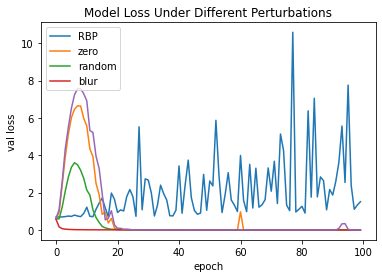

In [27]:

for loss in datasets_training_loss:
    plt.plot(loss)
plt.title('Model Loss Under Different Perturbations')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['RBP','zero','random','blur'], loc='upper left')
plt.savefig("realistic_perturb.eps", format='eps')
plt.show()